<a href="https://colab.research.google.com/github/raxx-58/Preprocessed-data/blob/main/India-IPL-LEAGUE-2008-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset path: /kaggle/input/ipl-complete-dataset-20082020
Using files:
Matches → /kaggle/input/ipl-complete-dataset-20082020/matches.csv
Deliveries → /kaggle/input/ipl-complete-dataset-20082020/deliveries.csv
✅ Matches loaded successfully: (1095, 20)
✅ Deliveries loaded successfully: (260920, 17)

--- Matches Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision   

/tmp/ipython-input-961965977.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='season', data=matches, palette='viridis', legend=False)


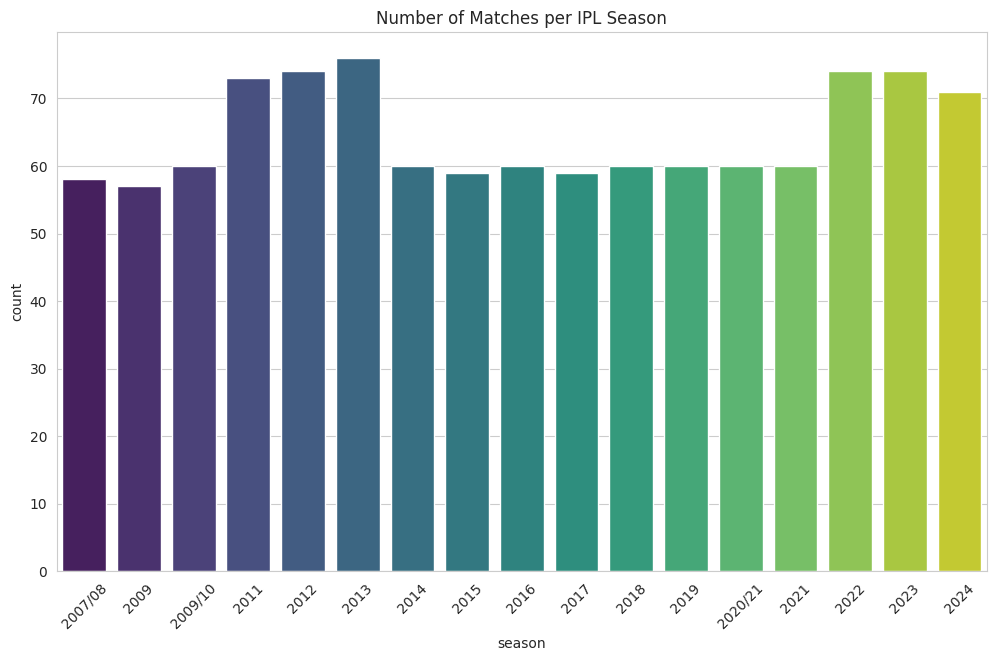

/tmp/ipython-input-961965977.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_winners.values, y=top_winners.index, palette='magma', legend=False)


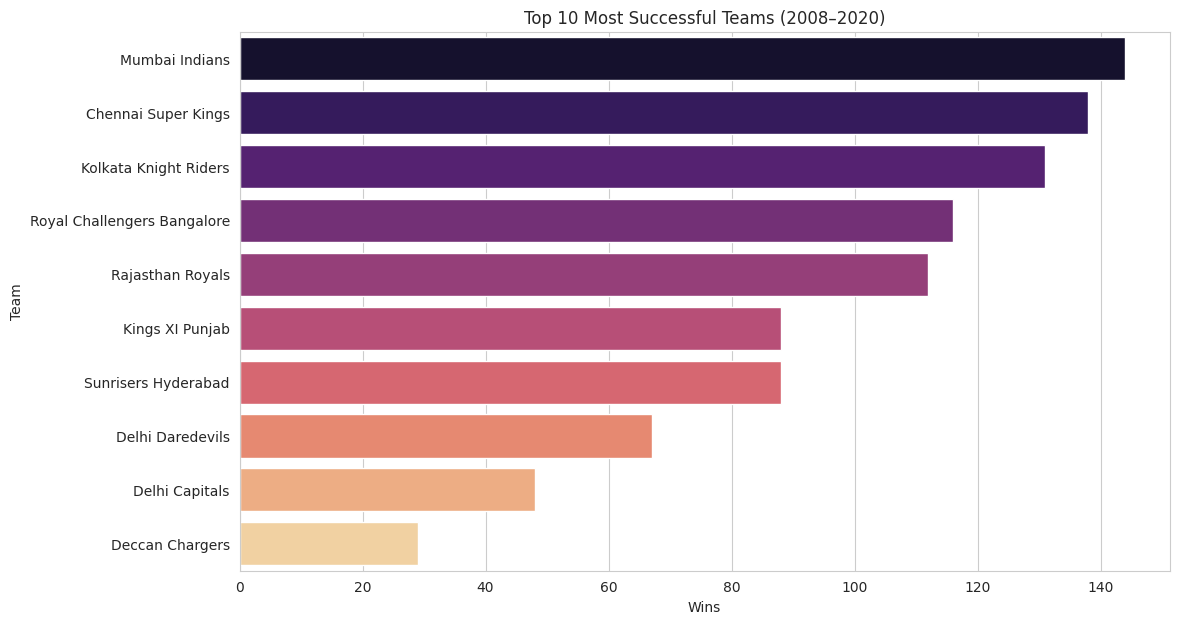

/tmp/ipython-input-961965977.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='toss_decision', data=matches, palette='cool', legend=False)


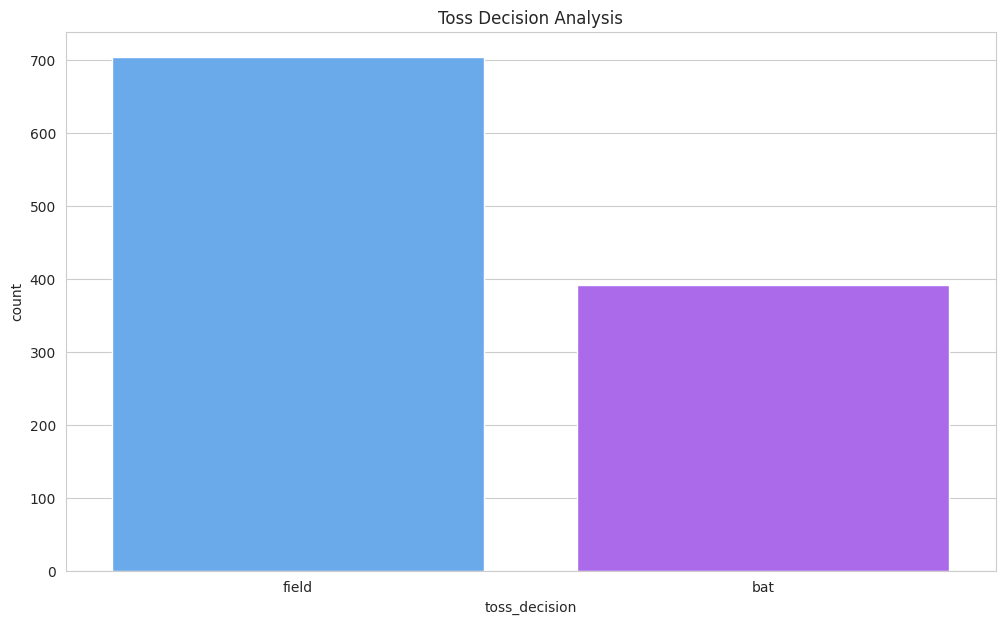


--- Deliveries Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder      

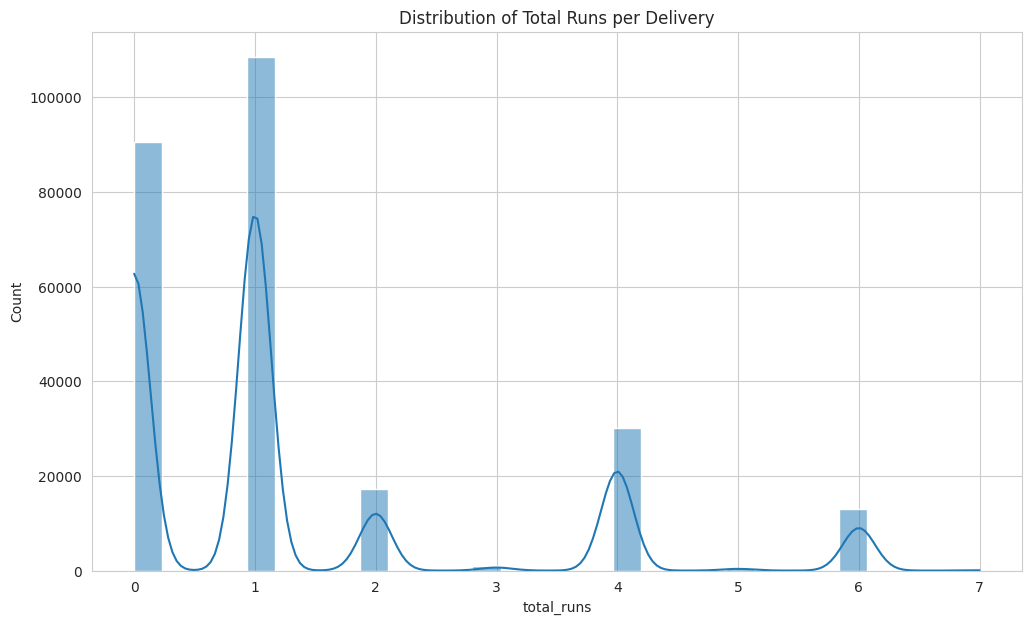

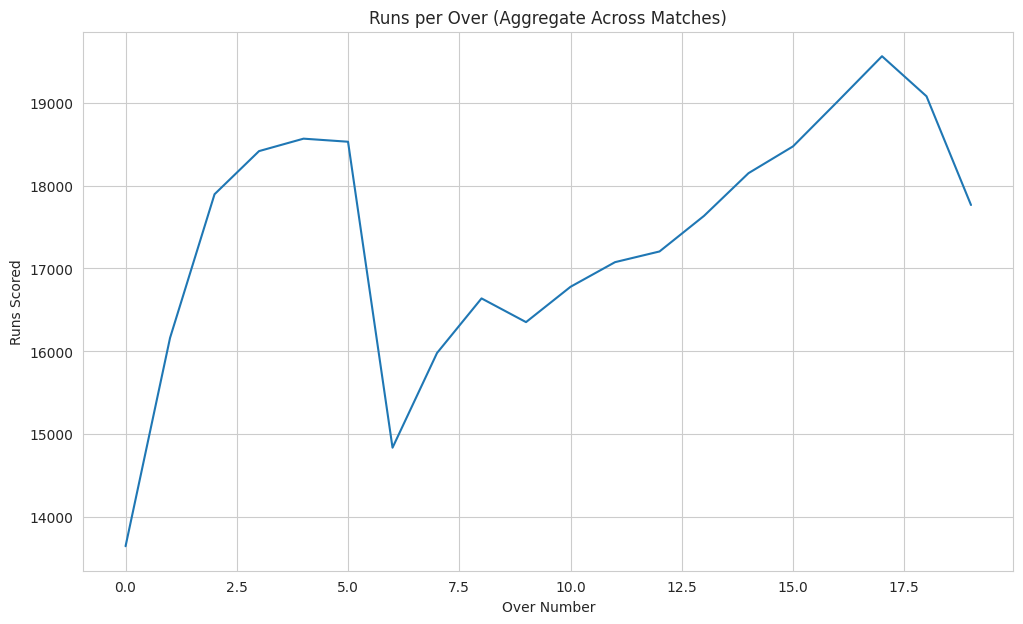


✅ Data preprocessing completed successfully!
Saved cleaned datasets → /kaggle/working/processed_ipl/


In [11]:
# ============================================================
# 🏏 IPL Dataset Preprocessing & Visualization Pipeline (2008–2020)
# ============================================================

# --- 1. Import libraries ---
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

# --- 2. Dataset path (update if needed) ---
path = "/kaggle/input/ipl-complete-dataset-20082020"
print("Dataset path:", path)

# --- 3. Helper function for flexible file lookup ---
def find_file(path, keyword):
    for file in os.listdir(path):
        if keyword.lower() in file.lower() and file.endswith(".csv"):
            return os.path.join(path, file)
    return None

# --- 4. Detect dataset files ---
matches_path = find_file(path, "match") or os.path.join(path, "matches.csv")
deliveries_path = find_file(path, "ball") or find_file(path, "deliveries")

print("Using files:")
print("Matches →", matches_path)
print("Deliveries →", deliveries_path)

# --- 5. Load Datasets ---
matches = pd.read_csv(matches_path)
print(f"✅ Matches loaded successfully: {matches.shape}")
if deliveries_path and os.path.exists(deliveries_path):
    deliveries = pd.read_csv(deliveries_path)
    print(f"✅ Deliveries loaded successfully: {deliveries.shape}")
else:
    deliveries = None
    print("⚠️ Deliveries dataset not found — skipping ball-by-ball preprocessing.")

# ============================================================
# 🧹 MATCHES DATA CLEANING
# ============================================================

print("\n--- Matches Info ---")
print(matches.info())

# --- Handle missing values ---
for col in matches.select_dtypes(include=['float64', 'int64']).columns:
    matches[col] = matches[col].fillna(matches[col].median())

for col in matches.select_dtypes(include=['object']).columns:
    matches[col] = matches[col].fillna("Unknown")

# --- Remove duplicates ---
matches.drop_duplicates(inplace=True)
print("✅ Duplicates removed.")

# ============================================================
# 📊 VISUALIZATIONS (Matches)
# ============================================================

# --- Matches per season ---
plt.figure()
sns.countplot(x='season', data=matches, palette='viridis', legend=False)
plt.title("Number of Matches per IPL Season")
plt.xticks(rotation=45)
plt.show()

# --- Top winning teams ---
top_winners = matches['winner'].value_counts().head(10)
plt.figure()
sns.barplot(x=top_winners.values, y=top_winners.index, palette='magma', legend=False)
plt.title("Top 10 Most Successful Teams (2008–2020)")
plt.xlabel("Wins")
plt.ylabel("Team")
plt.show()

# --- Toss Decision ---
plt.figure()
sns.countplot(x='toss_decision', data=matches, palette='cool', legend=False)
plt.title("Toss Decision Analysis")
plt.show()

# ============================================================
# 🧠 DELIVERIES DATA CLEANING & FEATURE ENGINEERING
# ============================================================
if deliveries is not None:
    print("\n--- Deliveries Info ---")
    print(deliveries.info())

    # Handle missing data
    deliveries.fillna({'batsman_runs': 0, 'bowler': 'Unknown'}, inplace=True)

    # Feature engineering
    deliveries['total_runs'] = (
        deliveries['batsman_runs'] + deliveries['extra_runs']
    )

    # ✅ Corrected safe cumulative wicket calculation
    deliveries['wickets_fallen'] = (
        deliveries.groupby(['match_id', 'inning'])['player_dismissed']
        .transform(lambda x: x.notnull().cumsum())
    )
    deliveries['wickets_left'] = 10 - deliveries['wickets_fallen']

    # Balls done per innings
    deliveries['balls_done'] = (deliveries['over'] - 1) * 6 + deliveries['ball']
    deliveries['balls_left'] = 120 - deliveries['balls_done']

    # Run Rate Features
    deliveries['current_run_rate'] = deliveries['total_runs'] / deliveries['balls_done'].replace(0, np.nan) * 6
    deliveries['required_run_rate'] = np.where(
        deliveries['balls_left'] > 0,
        (deliveries['total_runs'].max() - deliveries['total_runs']) / deliveries['balls_left'] * 6,
        0
    )

    # ============================================================
    # 📊 VISUALIZATIONS (Deliveries)
    # ============================================================
    plt.figure()
    sns.histplot(deliveries['total_runs'], bins=30, kde=True)
    plt.title("Distribution of Total Runs per Delivery")
    plt.show()

    plt.figure()
    sns.lineplot(data=deliveries.groupby('over')['total_runs'].sum())
    plt.title("Runs per Over (Aggregate Across Matches)")
    plt.xlabel("Over Number")
    plt.ylabel("Runs Scored")
    plt.show()

# ============================================================
# 💾 SAVE CLEANED DATASETS
# ============================================================
os.makedirs("/kaggle/working/processed_ipl", exist_ok=True)
matches.to_csv("/kaggle/working/processed_ipl/ipl_matches_prepared.csv", index=False)
if deliveries is not None:
    deliveries.to_csv("/kaggle/working/processed_ipl/ipl_deliveries_prepared.csv", index=False)

print("\n✅ Data preprocessing completed successfully!")
if deliveries is not None:
    print("Saved cleaned datasets → /kaggle/working/processed_ipl/")
